# Shift-invariant Wasserstein between diracs in 1D

The problem formulation is as follows:

Given two distributions of diracs in 1D $X$ and $Y$, compute:

$$\min_{\delta \in \mathbb{R}} W_2^2(X, Y_\delta)$$

where $W_2^2$ is the squared Wasserstein distance and $Y_\delta$ is the distribution $Y$ in which each dirac is shifted by $\delta$.

In [1]:
import ot
import numpy as np

X = np.array([0., 2., 3., 5.])
Y = np.array([4., 6., 7., 8.5])

pi, log = ot.emd_1d(X, Y, log=True)
print(pi)
print(log["cost"])

[[0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]]
15.0625


One should notice that, knowing that there exists one solution to the Wasserstein problem in 1d which consists in simply ranking the diracs in each distributions and then matching them in order, and observing that a translation of $\delta$ of all diracs in $Y$ do not change the order of the diracs in $Y$, one can say that the mapping $\pi$ that corresponds to such a solution of the Wasserstein problem between $X$ and $Y$ is also a solution to the Wasserstein problem between $X$ and $Y_\delta$ for any $\delta$.

If we denote this mapping by $\pi$, one can show that:

$$W_2^2(X, Y_\delta) = \delta^2 + \delta \left[\sum_{ij} 2 (y_j - x_i) \pi_{ij}\right] + W_2^2(X, Y)$$

This quantity is minimized at $\delta^\star = \sum_{ij} (x_i - y_j) \pi_{ij}$ and $W_2^2(X, Y_{\delta^\star}) = W_2^2(X, Y) - (\delta^\star)^2$, as illustrated below.

In [2]:
deltas = np.linspace(-10, 0, 100)
costs = [ot.emd_1d(X, Y + d, log=True)[1]["cost"] for d in deltas]

delta_star = np.sum((X[:, None] - Y[None, :]) * pi)
optimal_cost = log["cost"] - delta_star ** 2

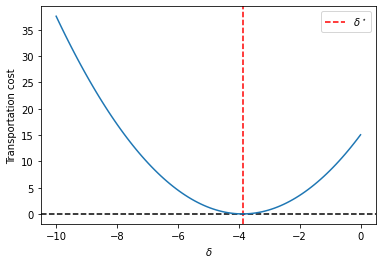

In [3]:
import matplotlib.pyplot as plt

plt.axvline(x=delta_star, color='r', linestyle='--', label="$\delta^\star$")
plt.axhline(y=optimal_cost, color='k', linestyle='--')
plt.plot(deltas, costs)
plt.xlabel("$\delta$")
plt.ylabel("Transportation cost")
plt.legend();

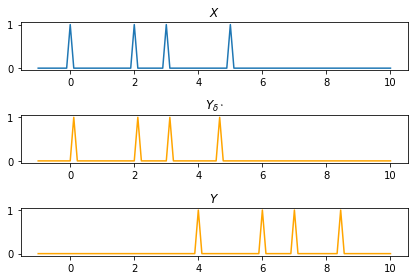

In [4]:
def format_diracs(positions, x_grid):
    y_grid = np.zeros(x_grid.shape)
    for xi in positions:
        idx = np.argmin(np.abs(x_grid - xi))
        y_grid[idx] = 1.
    return y_grid

x_grid = np.linspace(-1, 10, 100)

# X
plt.subplot(3, 1, 1)
plt.plot(x_grid, format_diracs(X, x_grid))
plt.title("$X$")

# Y
plt.subplot(3, 1, 3)
plt.plot(x_grid, format_diracs(Y, x_grid), color="orange")
plt.title("$Y$")

# Y+delta*
plt.subplot(3, 1, 2)
plt.plot(x_grid, format_diracs(Y+delta_star, x_grid), color="orange")
plt.title("$Y_{\delta^\star}$")

plt.tight_layout()